## Data pre-processing for clustering

### Calculate statistics of variables

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,var1,var2,var3
0,137,1.840,2.898
1,335,0.910,0.687
2,172,4.104,8.326
3,355,6.661,1.582
4,303,15.285,110.750


In [17]:

print(data.mean())


print(data.std())


print(data.describe())

var1    251.85000
var2      1.92559
var3     12.55028
dtype: float64
var1    90.993104
var2     2.583730
var3    34.516362
dtype: float64
             var1       var2        var3
count  100.000000  100.00000  100.000000
mean   251.850000    1.92559   12.550280
std     90.993104    2.58373   34.516362
min    101.000000    0.04800    0.002000
25%    171.750000    0.61250    0.280750
50%    250.000000    1.17550    1.260500
75%    339.250000    2.20800    5.568000
max    397.000000   15.31200  228.779000


### Detect skewed variables

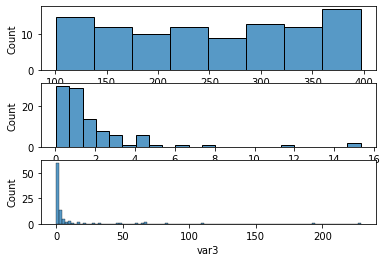

In [18]:

plt.subplot(3, 1, 1); sns.histplot(data['var1'])


plt.subplot(3, 1, 2); sns.histplot(data['var2'])


plt.subplot(3, 1, 3); sns.histplot(data['var3'])


plt.show()

### Manage skewness

/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


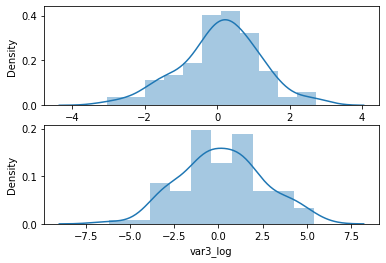

In [19]:

data['var2_log'] = np.log(data['var2'])


data['var3_log'] = np.log(data['var3'])


plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])


plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])


plt.show()

### Center and scale manually

In [20]:

data_centered = data - data.mean()


data_scaled = data / data.std()


data_normalized = (data - data.mean()) / data.std()


print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00      0.00     -0.00
std      1.00    1.00    1.00      1.00      1.00
min     -1.66   -0.73   -0.36     -2.83     -2.76
25%     -0.88   -0.51   -0.36     -0.52     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.96    0.11   -0.20      0.64      0.64
max      1.60    5.18    6.26      2.39      2.23


### Center and scale with StandardScaler()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:

scaler = StandardScaler()


scaler.fit(data)


data_normalized = scaler.transform(data)


data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)


print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00     -0.00     -0.00
std      1.01    1.01    1.01      1.01      1.01
min     -1.67   -0.73   -0.37     -2.85     -2.77
25%     -0.88   -0.51   -0.36     -0.53     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.97    0.11   -0.20      0.64      0.65
max      1.60    5.21    6.30      2.41      2.24


### Visualize RFM distributions

In [26]:
datamart_rfm = pd.read_csv('datamart_rfm.csv')

/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hakan.ozler/Developer/Notebooks/venv-3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

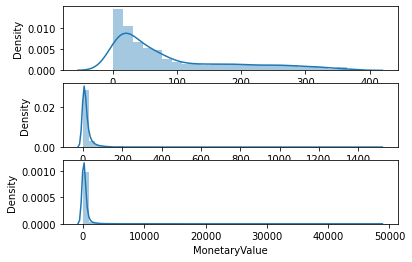

In [27]:

plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])


plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])


plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])


plt.show()

### Pre-process RFM data

In [28]:

datamart_log = np.log(datamart_rfm)


scaler = StandardScaler()
scaler.fit(datamart_log)


datamart_normalized = scaler.transform(datamart_log)


datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)